In [ ]:
from google.colab import files
data = files.upload()

Saving letterCG.bin to letterCG.bin


In [ ]:
#import Libraries
import pandas as pd
import numpy as np

#Visualization library
import matplotlib.pyplot as plt

#import train test plit from sklearn to spli train and test data
from sklearn.model_selection import train_test_split

#import adaBoost foe classification with weak learners
#AdaBoost by default use decision tree algorithm along with max_depth as 1
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#import accuracy_score from sklearn metrics to calculate the accuracy of the model
from sklearn.metrics import accuracy_score

In [ ]:
#Read binary file 
with open("letterCG.bin", mode='rb') as file:
  f = file.read()

In [ ]:
#check the content of binary file
print(type(f))
print(f)

<class 'bytes'>
b'Class x-box y-box width high  onpix x-bar y-bar x2bar y2bar xybar x2ybr xy2br x-ege xegvy y-ege yegvx \nC 4 10 5 8 2 5 7 7 10 7 6 13 1 8 4 9\nC 3 5 4 4 2 4 8 5 7 12 9 11 1 10 2 7\nG 5 10 6 7 3 8 7 8 8 6 7 9 2 7 5 10\nC 5 9 6 7 4 3 8 6 7 12 10 13 1 9 3 7\nG 4 8 5 6 3 6 6 7 6 10 7 12 2 9 4 9\nG 2 1 2 2 1 7 7 6 5 6 6 10 2 9 4 9\nG 3 7 4 5 3 6 5 5 6 6 6 9 2 9 3 7\nC 3 6 5 4 1 6 8 6 10 7 7 12 1 7 4 9\nG 5 7 6 5 3 6 7 6 6 10 8 8 2 9 5 9\nC 5 8 6 6 2 6 7 7 10 6 6 15 1 8 4 9\nG 4 7 5 5 3 6 6 6 7 6 5 9 2 10 4 7\nC 2 3 2 2 1 6 8 6 7 8 7 13 1 9 3 10\nC 4 7 5 5 2 5 8 7 10 6 7 11 1 7 4 8\nG 2 1 2 1 1 8 6 6 6 6 5 9 1 7 5 10\nG 4 7 6 5 3 7 6 7 8 8 5 12 2 10 4 8\nC 4 7 5 5 3 7 7 8 6 7 6 10 3 8 3 9\nG 4 7 5 5 3 6 7 7 7 10 7 11 2 9 4 9\nG 5 6 6 6 7 7 9 6 2 7 7 7 9 12 9 7\nG 5 7 6 5 6 7 6 5 3 7 6 9 5 8 7 7\nC 5 10 6 8 4 4 8 7 9 8 9 13 1 8 4 9\nC 4 11 5 8 4 5 8 8 6 10 8 13 3 12 5 8\nC 6 10 6 7 4 6 8 7 8 13 8 10 2 11 3 7\nG 3 5 4 4 2 6 6 5 5 9 7 11 2 9 4 10\nG 5 8 7 7 7 7 10 5 2 7 7 8 6 1

In [ ]:
#Extract data using ASCII 
data_decode = f.decode('ASCII')
type(data_decode)

str

In [ ]:
print(data_decode[0:103])

Class x-box y-box width high  onpix x-bar y-bar x2bar y2bar xybar x2ybr xy2br x-ege xegvy y-ege yegvx 



In [ ]:
#Convert string to array
array = np.array(data_decode.split('\n'))

In [ ]:
#Convert array to dataframe 
#for processing data to model
df = pd.DataFrame(array)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1511 non-null   object
dtypes: object(1)
memory usage: 11.9+ KB


In [ ]:
#split data into different columns
data = df[0].str.split(expand=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
1,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
2,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
3,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
4,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7


In [ ]:
#Add headers to data
data.columns = data.iloc[0]
data.drop([0], axis=0, inplace=True)
data.head()

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
1,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
2,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
3,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
4,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
5,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1510 entries, 1 to 1510
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   1509 non-null   object
 1   x-box   1509 non-null   object
 2   y-box   1509 non-null   object
 3   width   1509 non-null   object
 4   high    1509 non-null   object
 5   onpix   1509 non-null   object
 6   x-bar   1509 non-null   object
 7   y-bar   1509 non-null   object
 8   x2bar   1509 non-null   object
 9   y2bar   1509 non-null   object
 10  xybar   1509 non-null   object
 11  x2ybr   1509 non-null   object
 12  xy2br   1509 non-null   object
 13  x-ege   1509 non-null   object
 14  xegvy   1509 non-null   object
 15  y-ege   1509 non-null   object
 16  yegvx   1509 non-null   object
dtypes: object(17)
memory usage: 212.3+ KB


In [ ]:
#Analyse data
data.tail()

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
1506,C,6,11,7,8,4,6,7,10,9,10,7,11,2,12,4,9
1507,G,5,9,6,7,4,6,7,6,6,10,7,10,2,9,5,9
1508,C,6,11,7,8,5,5,8,7,6,8,8,15,4,9,6,6
1509,C,5,10,5,8,3,6,8,7,7,13,7,9,2,11,3,7
1510,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
#drop last row as not representing any data
data.drop([1510], axis=0, inplace=True)

In [ ]:
data.tail()

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
1505,C,5,10,6,8,4,5,8,9,9,9,9,12,2,10,4,9
1506,C,6,11,7,8,4,6,7,10,9,10,7,11,2,12,4,9
1507,G,5,9,6,7,4,6,7,6,6,10,7,10,2,9,5,9
1508,C,6,11,7,8,5,5,8,7,6,8,8,15,4,9,6,6
1509,C,5,10,5,8,3,6,8,7,7,13,7,9,2,11,3,7


In [ ]:
#setting index
#data.set_index(['Class'], drop=True, inplace=True)
#data.reset_index(inplace=True)

In [ ]:
data.head()

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9


In [ ]:
#Encoding labels using get_dummies function
data['Class'] = pd.get_dummies(data['Class'], drop_first=True)
#Check encodeding done
data.head()

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,0,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,0,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,1,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,0,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,1,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9


In [ ]:
#Separate all numerical features and labels 
X = data.drop(labels='Class', axis=1)
y = data['Class']

In [ ]:
display(X.shape)
display(y.shape)

(1509, 16)

(1509,)

In [ ]:
#split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1056, 16)

(453, 16)

(1056,)

(453,)

### MAX-DEPTH = 1

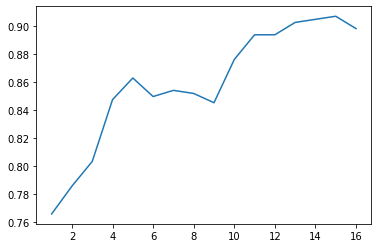

In [ ]:
#model accuracy checking using different number of weak learners range from 1 to 16
accuracy = []
clf = DecisionTreeClassifier(max_depth=1)

clf.fit(X,y)

#Function to check the 
def adaBoost_accuracy(X_train, X_test, y_train, y_test, weak_learners_range):
  
  for i in weak_learners_range:
    #create adaboost classifier object 
    ada_boost = AdaBoostClassifier(clf, n_estimators = i, random_state=0) 
    #train adaboost classifier
    ada_boost.fit(X_train, y_train)

    #predict the response of test data
    pred = ada_boost.predict(X_test)

    #Evaluate the model, how often the classifier is correct?
    accuracy.append(accuracy_score(y_test, pred))

  return accuracy

weak_learners = range(1, 17, 1)
score = adaBoost_accuracy(X_train, X_test, y_train, y_test, weak_learners)

#Plot the model accuracy VS number of learners
plt.plot(weak_learners, accuracy)
plt.show()

### MAX - DEPTH = 2

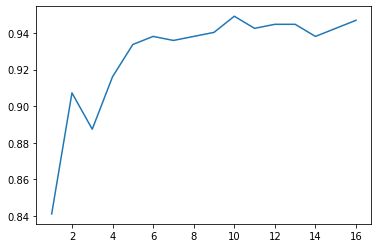

In [ ]:
#model accuracy checking using different number of weak learners range from 1 to 16
accuracy = []
clf = DecisionTreeClassifier(max_depth=2)

clf.fit(X,y)

#Function to check the 
def adaBoost_accuracy(X_train, X_test, y_train, y_test, weak_learners_range):
  
  for i in weak_learners_range:
    #create adaboost classifier object 
    ada_boost = AdaBoostClassifier(clf, n_estimators = i, random_state=0) 
    #train adaboost classifier
    ada_boost.fit(X_train, y_train)

    #predict the response of test data
    pred = ada_boost.predict(X_test)

    #Evaluate the model, how often the classifier is correct?
    accuracy.append(accuracy_score(y_test, pred))

  return accuracy

weak_learners = range(1, 17, 1)
score = adaBoost_accuracy(X_train, X_test, y_train, y_test, weak_learners)

#Plot the model accuracy VS number of learners
plt.plot(weak_learners, accuracy)
plt.show()